In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model.logistic import LogisticRegression
import  matplotlib.pyplot as plt

# 数据加载
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')


# 使用平均年龄来填充年龄中的nan值
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

# 使用票价的均值填充票价中的nan值
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)


# 使用登录最多的港口来填充登录港口的nan值
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S',inplace=True)

# 特征选择
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
train_labels = train_data['Survived']
test_features = test_data[features]

# 特征向量化，无稀疏矩阵
dvec=DictVectorizer(sparse=False)
train_features=dvec.fit_transform(train_features.to_dict(orient='record'))
print(dvec.feature_names_)


['Age', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp']


[LibLinear][ -1.55531285  34.26688845  29.17524188  16.36120837   0.1417803
  -4.21450153 -43.97007587 100.         -20.1966613  -14.14351009]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


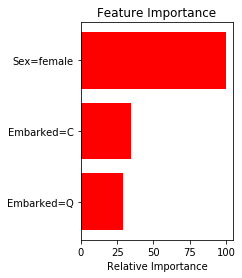

In [2]:
def show_feature_importance(feature_list, feature_importance):
	# 设定阈值
	fi_threshold = 20
	# 重要特征的下标
	important_idx = np.where(feature_importance > fi_threshold)[0]
	# 特征名称
	important_features = [feature_list[i] for i in important_idx]
	# 重要特征
	sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
	# 可视化
	pos = np.arange(sorted_idx.shape[0]) + 0.5
	plt.subplot(1, 2, 2)
	plt.title('Feature Importance')
	plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], color='r',align='center')
	plt.yticks(pos, [important_features[i] for i in sorted_idx[::-1]])
	plt.xlabel('Relative Importance')
	plt.draw()
	plt.show()

# 构造LR分类器
#clf = RandomForestClassifier(oob_score=True, n_estimators=100)
clf = LogisticRegression(max_iter=100, verbose=True, random_state=33, tol=1e-4)

# 决策树训练
clf.fit(train_features, train_labels)
# 获取特征重要性
#feature_importance = clf.feature_importances_[0]
feature_importance = clf.coef_[0]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
print(feature_importance)

# 重要特征可视化
show_feature_importance(dvec.feature_names_, feature_importance)

In [3]:
# 方法2
# 构造ID3决策树
clf = DecisionTreeClassifier(criterion='entropy')
# 决策树训练
clf.fit(train_features, train_labels)

test_features=dvec.transform(test_features.to_dict(orient='record'))
# 决策树预测
pred_labels = clf.predict(test_features)

# 得到决策树准确率(基于训练集)
acc_decision_tree = round(clf.score(train_features, train_labels), 6)
print(u'score准确率为 %.4lf' % acc_decision_tree)

# 使用K折交叉验证 统计决策树准确率
print(u'cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf, train_features, train_labels, cv=10)))


score准确率为 0.9820
cross_val_score准确率为 0.7880
